importing necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

take your data as input and split it up into parameters (X) and predictor variable (Y)

In [6]:
data = pd.read_csv("austin_final.csv")

# the features or the 'x' values of the data
# these columns are used to train the model
# the last column, i.e, precipitation column
# will serve as the label
X = data.drop(['PrecipitationSumInches'], axis = 1)
X = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
                  'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
                  'WindAvgMPH'], axis = 1)

# the output or the label.
Y = data['PrecipitationSumInches']
# reshaping it into a 2-D vector
Y = Y.values.reshape(-1, 1)

In [ ]:
Y.shape

(1319, 1)

In [ ]:
X.shape

(1319, 6)

Here X is 1319x6 data matrix, that has features such as TempAvg, DewPoint, Humidity. Each row of X is a day in Austin.

Y is the target output, which is rainfall in inches for that day.

In [ ]:
# check what X and Y look like and what type they are. Feel free to do this and mess around throughout the lab so you are comfortable with what we are doing.

The next four cells are data plotting to understanding the data -- this should be done before the ML fit is done

In [ ]:
day_index = 798 #this will be colored red in next plot
days = [i for i in range(Y.size)]

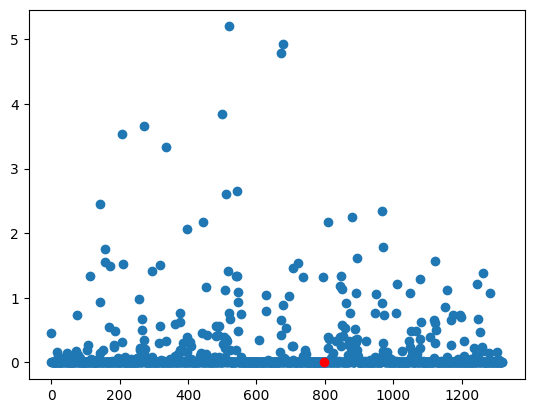

In [ ]:
# plt.scatter(days, Y, color = 'g')
plt.scatter(days, Y)
plt.scatter(days[day_index], Y[day_index], color ='r')

In [ ]:
X.corr()

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH
TempAvgF,1.000000,0.837222,0.022763,-0.138524,0.148463,0.034267
DewPointAvgF,0.837222,1.000000,0.450622,0.101505,0.056602,0.038257
HumidityAvgPercent,0.022763,0.450622,1.000000,0.069634,-0.449230,-0.000472
SeaLevelPressureAvgInches,-0.138524,0.101505,0.069634,1.000000,0.260125,0.046604
VisibilityAvgMiles,0.148463,0.056602,-0.449230,0.260125,1.000000,0.026522
WindAvgMPH,0.034267,0.038257,-0.000472,0.046604,0.026522,1.000000


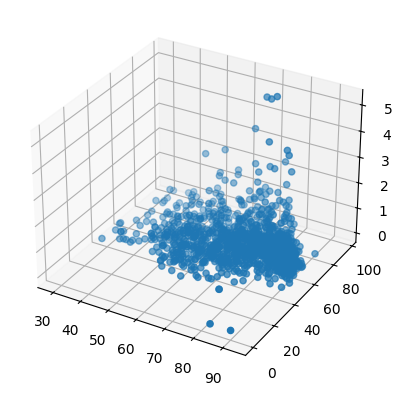

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[X.columns.values[0]], X[X.columns.values[2]],Y)

Used random permutation of rows to split data matrix X into training, validation, test sets. Can also be done using pandas or other methods.

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_temp, Y_train, Y_temp = train_test_split(X.to_numpy(), Y, test_size=0.3)
# 70% training and 30% for testing and vailidation
# X is a pandas data frame so we convert it to a numpy array for inu

X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5)
# we split the temporary samples from the dataset into testing and validation halves

Now write a function that can do this, using only numpy

In [8]:
# get the train

def train_val_test_split(X, Y): # split up the dataset into a training and testing set.
    p = np.random.permutation(len(Y))
    tr = np.floor(len(Y)*0.7).astype('int')
    te = np.floor(len(Y)*0.8).astype('int')
    X_train = X[p[:tr],:]
    Y_train = Y[p[:tr]]
    X_val = X[p[tr+1:te],:]
    Y_val = Y[p[tr+1:te]]
    X_test = X[p[te+1:],:]
    Y_test = Y[p[te+1:]]
    return X_train, Y_train, X_val, Y_val, X_test, Y_test

In [ ]:
#X is a pandas data frame, that has to be converted into a numpy array
X_train, Y_train, X_val, Y_val, X_test, Y_test = train_val_test_split(X.to_numpy(),Y)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
LR = LinearRegression()

In [11]:
# use sklearn to fit training data matrix to training output
LR.fit(X_train,Y_train)

LinearRegression()

In [12]:
# These are the thetas that are result of the above fit
print(LR.intercept_,LR.coef_)

[0.7777065] [[-0.00881735  0.01030631  0.00166217  0.00279412 -0.09590265  0.01324062]]


In [13]:
#Use sklearn predict function to predict output for validation data matrix
Yhat_skl_val = LR.predict(X_val)

In [14]:
#This is the Mean Square error -- insample (error in that data used for fitting) and outsample (error in the data not used for fitting)
E_in = np.mean((Y_train-LR.predict(X_train))**2)
E_out = np.mean((Y_val-LR.predict(X_val))**2)
print(E_in,E_out)


0.1829174514641075 0.1091367191549433



$$
\verb|pinv_theta| = (X_{\text{{train}}}^T X_{\text{{train}}})^{-1} X_{\text{{train}}}^T Y_{\text{{train}}}
$$

$\verb|pinv_theta|$ represents the parameters of a linear regression model that minimizes the mean square error between the model’s predictions and the actual outputs.

In [15]:
#Here we are using the psuedo inverse/analytical method to get an analytical solution for minimizing mean square error

pinv_theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.transpose(),X_train)),X_train.transpose()),Y_train)
#                                              From Ab: pinv_theta = (A^T A)^{-1}A^{T}b  (moore-penrose pseudoinverse)

In [16]:
# For the linear regression model this is the predicted output
def predict(X, theta):
    return np.matmul(X,theta)

In [17]:
pinv_theta

array([[-0.00465278],
       [ 0.00618287],
       [ 0.00415276],
       [ 0.01989247],
       [-0.09214848],
       [ 0.01384736]])

In [18]:
#predicting output using the pinv_theta from above

Yhat_pinv_val = predict(X_val,pinv_theta)

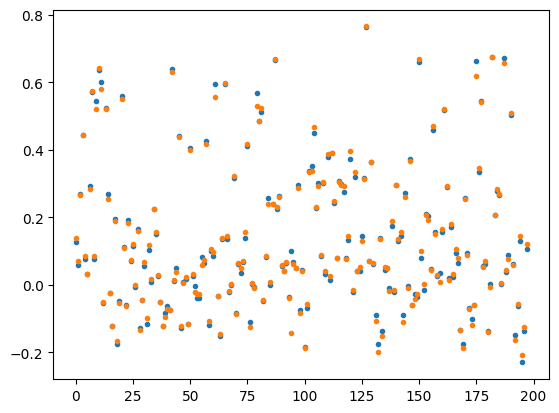

In [19]:
plt.plot(Yhat_skl_val,'.')
plt.plot(Yhat_pinv_val,'.')
# plt.plot(hatY_val,'.')
#plt.plot(hatY_aug_val,'.')

In [20]:
#E_in and E_out for the psuedo inverse method
E_in = np.mean((Y_train-predict(X_train,pinv_theta))**2)
E_out = np.mean((Y_val-Yhat_pinv_val)**2)
print(E_in,E_out)

0.1834612519906787 0.10818596853041873


Above data matrix does not have a "1" column, so the intercept (theta_0) can not be modelled. Below augment X by adding a one column

In [21]:
X_aug_train =  np.c_[X_train,np.ones(len(Y_train))]
X_aug_val =  np.c_[X_val,np.ones(len(Y_val))]

$$(X_{at}^{T}X_{at})^{-1}X_{at}^{T}Y_{t}$$

In [24]:
pinv_aug_theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_aug_train.transpose(),X_aug_train)),X_aug_train.transpose()),Y_train)
# pinv_aug_theta = np.linalg.inv(X_aug_train.T @ X_aug_train) @ X_aug_train.T @ Y_train
                                                # }

In [26]:
Yhat_pinv_aug_val = predict(X_aug_val,pinv_aug_theta)

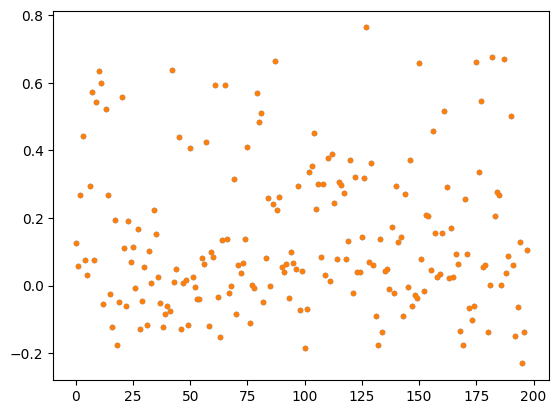

In [29]:
plt.plot(Yhat_skl_val,'.')
plt.plot(Yhat_pinv_aug_val,'.')
# perfectly matches the Y_hats from sk_learn's algorithm after we model the intercept as well

In [ ]:
#E_in and E_out for the psuedo inverse method
E_in = np.mean((Y_train-predict(X_aug_train,pinv_aug_theta))**2)
E_out = np.mean((Y_val-Yhat_pinv_aug_val)**2)
print(E_in,E_out)

0.11202966791224989 0.29738366417031165


In [ ]:
#Initializing theta -- could be all zero or random numbers with mean zero
def init(X,zeros=True):
    n = X.shape[1]
    if zeros:
        theta = np.zeros((n,1))
    else:
        theta = np.random.rand(n,1)-0.5
        theta[-1] = 0
    return theta

In [ ]:
theta = init(X_train,zeros=False)

In [ ]:
#initial prediction
predict(X_train,theta)

array([[-66.52924767],
       [-50.72537248],
       [-64.77280721],
       [-51.62306101],
       [-64.70732344],
       [-64.47495624],
       [-63.39843005],
       [-65.80060676],
       [-55.86265793],
       [-55.36388335],
       [-66.26747378],
       [-55.44543773],
       [-58.30494741],
       [-59.41017881],
       [-66.11127498],
       [-65.67548923],
       [-68.62144968],
       [-63.89342335],
       [-59.18382472],
       [-68.01106315],
       [-67.11110896],
       [-64.98648428],
       [-65.28433095],
       [-65.01703544],
       [-61.42211513],
       [-53.01165581],
       [-65.11906462],
       [-53.81877991],
       [-67.06690361],
       [-57.36669057],
       [-65.8110117 ],
       [-65.39856673],
       [-67.72291564],
       [-58.87294469],
       [-63.34081623],
       [-62.23946142],
       [-68.12564019],
       [-67.38126375],
       [-53.09039135],
       [-40.21518476],
       [-53.9179052 ],
       [-64.43326022],
       [-56.72658842],
       [-52

In [ ]:
#Update for each theta
def update_weights( X, Y,  theta ) :
        Y_pred = predict(X, theta)
        # calculate gradients
        m = X.shape[0]
        dtheta = - ( 2 * ( X.T ).dot( Y - Y_pred )  ) / m
        # detheta = np.array([0, 0, 0, 0, 0, 0, 0])
        # for j in range(len(detheta)):
        #     for i in range(m):
        #         detheta[j] += (Y[i] - Y_pred[i]) * X[i][j]
        # dtheta = -2 * detheta / m
        return dtheta

$dtheta = - \frac{2}{m} * (X^{T}) \cdot (Y - h_{\theta}(X))$

In [ ]:
update_weights(X_train,Y_train,theta)

array([[-8675.32677058],
       [-6961.42874272],
       [-8121.71279084],
       [-3618.20442292],
       [-1097.2860622 ],
       [ -599.41503294]])

In [ ]:
def mse(X,Y,theta): # mean square error
    Y_pred = predict(X, theta)
    return np.mean((Y-Y_pred)**2)

In [ ]:
#iterative SGD each update with the entire training set -- batch gradient descent, page 5 Andrew Ng notes,
learning_rate = 0.00001
theta = init(X_aug_train)
# for _ in range(1000):
prev_loss = 0
iteration = 0
loss = mse(X_aug_train,Y_train,theta)
while (abs(prev_loss - loss) > 1e-9):
    learning_rate = 0.00001 / (1 + iteration * 0.000001)
    iteration += 1
    loss = mse(X_aug_train,Y_train,theta)
    prev_loss = loss
    dtheta = update_weights(X_aug_train,Y_train,theta)
    print(dtheta)
    theta = theta-learning_rate*dtheta

[[-13.60468039]
 [-12.39783315]
 [-16.37302275]
 [ -5.93451441]
 [ -1.34881907]
 [ -1.01947996]
 [ -0.19798483]]


Principal component analysis (PCA) is usually explained via an eigen-decomposition of the covariance matrix.

In [ ]:
X

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH
0,60,49.0,75.0,29.68,7.0,4.0
1,48,36.0,68.0,30.13,10.0,6.0
2,45,27.0,52.0,30.49,10.0,3.0
3,46,28.0,56.0,30.45,10.0,4.0
4,50,40.0,71.0,30.33,10.0,2.0
...,...,...,...,...,...,...
1314,89,67.0,54.0,29.97,10.0,5.0
1315,91,64.0,54.0,29.90,10.0,5.0
1316,92,64.0,51.0,29.86,10.0,4.0
1317,93,68.0,48.0,29.91,10.0,4.0


In [ ]:
data.drop(['PrecipitationSumInches'], axis = 1).shape

(1319, 18)

In [ ]:
cov_matrix = np.cov(X.to_numpy().T)

eigenvalues, eigenvectors = np.linalg.eig (cov_matrix)

sorted_indices = np.argsort (eigenvalues) [::-1]
sorted_eigenvalues = eigenvalues [sorted_indices]
sorted_eigenvectors = eigenvectors [:, sorted_indices]

n = 1
principal_eigenvectors = sorted_eigenvectors [:, :n]



In [ ]:
principal_eigenvectors

array([[6.14290671e-01],
       [7.43012091e-01],
       [2.65636951e-01],
       [6.98987440e-04],
       [1.67432737e-03],
       [3.70441026e-03]])

task: implement this using SVD.

The process is as below:

1. Center the Data: Subtract the column mean from each column of your data matrix B.
2. Compute the SVD of B: Perform Singular Value Decomposition on the centered data matrix to get matrices U, Σ (Sigma), and V^T. In Python, you can use numpy.linalg.svd to do this  .
3. Calculate Principal Components (PCs): The principal components are given by the product of U and Sigma (U * Σ)2.

In [ ]:

# Step 1: Center the data
X_centered = X - np.mean(X, axis=0)

# Step 2: Compute the SVD of the centered data
U, s, Vt = np.linalg.svd(X, full_matrices=False)

# Step 3: Calculate the Principal Components
PC = np.dot(U[:, :len(s)], np.diag(s))

PC[0]

array([-111.07005641,  -15.19856697,    0.76761923,   -1.54897026,
         -0.75559606,    0.88828864])